In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import plot_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
# Load the dataset
file_path = '/content/mlp_data_preprocessed.csv'
data = pd.read_csv(file_path)

In [ ]:
# Split the data into features and target
X = data.drop('good_bad', axis=1)
y = data['good_bad']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# using StandardScaler for numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Define the deep component
deep_input = Input(shape=(X_train_scaled.shape[1],))
deep_model = Dense(256, activation='relu')(deep_input)
deep_model = Dense(128, activation='relu')(deep_model)
deep_model = Dense(64, activation='relu')(deep_model)

In [ ]:
# Define the wide component
wide_input = Input(shape=(X_train_scaled.shape[1],))
wide_model = Dense(64, activation='linear')(wide_input)

In [ ]:
# Combine deep and wide components
combined = concatenate([deep_model, wide_model])
final_model_output = Dense(1, activation='relu')(combined)

In [ ]:
# Create the final model
model = Model(inputs=[deep_input, wide_input], outputs=final_model_output)

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit([X_train_scaled, X_train_scaled], y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
7919/7919 [==============================] - 32s 4ms/step - loss: 1.5408 - accuracy: 0.8987 - val_loss: 1.5726 - val_accuracy: 0.8969
Epoch 2/10
7919/7919 [==============================] - 29s 4ms/step - loss: 1.5354 - accuracy: 0.8993 - val_loss: 1.5726 - val_accuracy: 0.8969
Epoch 3/10
7919/7919 [==============================] - 31s 4ms/step - loss: 1.5354 - accuracy: 0.8993 - val_loss: 1.5726 - val_accuracy: 0.8969
Epoch 4/10
7919/7919 [==============================] - 29s 4ms/step - loss: 1.5354 - accuracy: 0.8993 - val_loss: 1.5726 - val_accuracy: 0.8969
Epoch 5/10
7919/7919 [==============================] - 29s 4ms/step - loss: 1.5354 - accuracy: 0.8993 - val_loss: 1.5726 - val_accuracy: 0.8969
Epoch 6/10
7919/7919 [==============================] - 29s 4ms/step - loss: 1.5354 - accuracy: 0.8993 - val_loss: 1.5726 - val_accuracy: 0.8969
Epoch 7/10
7919/7919 [==============================] - 29s 4ms/step - loss: 1.5354 - accuracy: 0.8993 - val_loss: 1.5726 - val_ac

In [ ]:
model.evaluate([X_test_scaled, X_test_scaled], y_test)

2475/2475 [==============================] - 5s 2ms/step - loss: 1.5385 - accuracy: 0.8991


[1.5384852886199951, 0.8991122245788574]

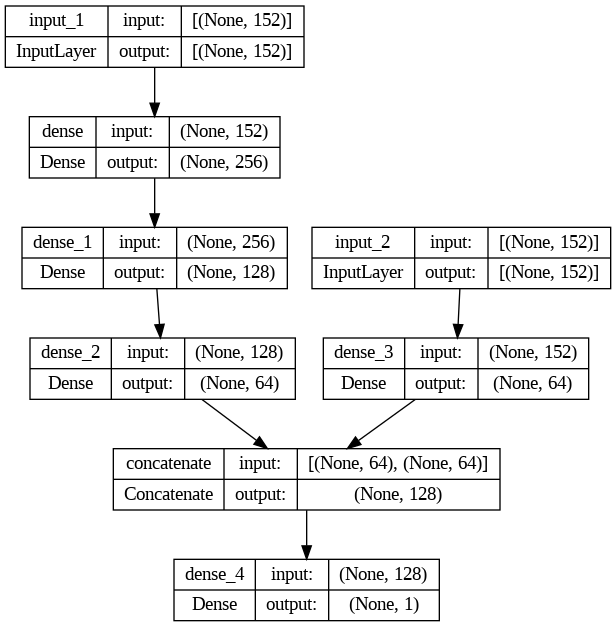

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Combine deep and wide components
combined = concatenate([deep_model, wide_model])

# Final model output with sigmoid activation for binary classification
final_model_output = Dense(1, activation='sigmoid')(combined)

# Create the final model
model = Model(inputs=[deep_input, wide_input], outputs=final_model_output)

# Compile the model with binary_crossentropy loss for a binary classification problem
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit([X_train_scaled, X_train_scaled], y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
7919/7919 [==============================] - 29s 4ms/step - loss: 0.2820 - accuracy: 0.8987 - val_loss: 0.2818 - val_accuracy: 0.8973
Epoch 2/10
7919/7919 [==============================] - 28s 4ms/step - loss: 0.2687 - accuracy: 0.9002 - val_loss: 0.2789 - val_accuracy: 0.8969
Epoch 3/10
7919/7919 [==============================] - 29s 4ms/step - loss: 0.2654 - accuracy: 0.9005 - val_loss: 0.2741 - val_accuracy: 0.8977
Epoch 4/10
7919/7919 [==============================] - 29s 4ms/step - loss: 0.2628 - accuracy: 0.9008 - val_loss: 0.2752 - val_accuracy: 0.8971
Epoch 5/10
7919/7919 [==============================] - 27s 3ms/step - loss: 0.2602 - accuracy: 0.9013 - val_loss: 0.2735 - val_accuracy: 0.8976
Epoch 6/10
7919/7919 [==============================] - 29s 4ms/step - loss: 0.2581 - accuracy: 0.9023 - val_loss: 0.2768 - val_accuracy: 0.8971
Epoch 7/10
7919/7919 [==============================] - 30s 4ms/step - loss: 0.2556 - accuracy: 0.9031 - val_loss: 0.2780 - val_ac

In [ ]:
model.evaluate([X_test_scaled, X_test_scaled], y_test)

2475/2475 [==============================] - 4s 2ms/step - loss: 0.2802 - accuracy: 0.8969


[0.2802280783653259, 0.8969022631645203]

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Convert the importances into a DataFrame
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

# Sort the DataFrame to discover the most important features
feature_importances.sort_values(by='importance', ascending=False, inplace=True)

In [ ]:
print(feature_importances.head(10))

                        feature  importance
15              last_pymnt_amnt    0.083772
3                      int_rate    0.046812
6                           dti    0.046254
20                  tot_cur_bal    0.045740
11                    revol_bal    0.044980
12                   revol_util    0.044684
23  mths_since_earliest_cr_line    0.044535
21             total_rev_hi_lim    0.044284
5                    annual_inc    0.042046
4                   installment    0.040425


In [ ]:
predictions = model.predict([X_test_scaled, X_test_scaled])

2475/2475 [==============================] - 5s 2ms/step


In [ ]:
print("Sample Predictions:", predictions[:10])

Sample Predictions: [[0.6194865 ]
 [0.9932231 ]
 [0.6736566 ]
 [0.68993247]
 [0.7812142 ]
 [0.58694327]
 [0.99996674]
 [0.8244167 ]
 [0.99999964]
 [0.9533729 ]]


In [ ]:
# For binary classification with sigmoid output
binary_predictions = (predictions > 0.5).astype(int)

In [ ]:
print("Sample Binary Predictions:", binary_predictions[:10])

Sample Binary Predictions: [[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [ ]:
# Calculate metrics
accuracy = accuracy_score(y_test, binary_predictions)
precision = precision_score(y_test, binary_predictions)
recall = recall_score(y_test, binary_predictions)
f1 = f1_score(y_test, binary_predictions)
roc_auc = roc_auc_score(y_test, predictions)

In [ ]:
# Print the metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC-AUC: {roc_auc}')

Accuracy: 0.896902269311882
Precision: 0.9047282720361619
Recall: 0.9895362229276103
F1 Score: 0.9452337827866103
ROC-AUC: 0.7865294953810738
